## Importing libraries

In [1]:
from pyspark.sql import SparkSession
from matplotlib import pyplot as plt

## Starting Spark Session

In [2]:
spark = SparkSession.builder.appName('practice').getOrCreate()

In [3]:
spark

## Pulling Netflix data from HDFS

In [4]:
df_pyspark = spark.read.options(header = True , inferSchema= True).csv("hdfs://localhost:9000/user/Amar/netflix_data/netflix_userbase_data.csv",inferSchema = True)

In [62]:
df_pyspark.show()


+-----------------+--------------------------+----------+-----------------+--------------+---+------+----------+-------------+
|Subscription Type|Monthly Revenue(in dollar)| Join Date|Last Payment Date|       Country|Age|Gender|    Device|Plan Duration|
+-----------------+--------------------------+----------+-----------------+--------------+---+------+----------+-------------+
|            Basic|                        10|15-01-2022|       10-06-2023| United States| 28|  Male|Smartphone|      1 Month|
|          Premium|                        15|05-09-2021|       22-06-2023|        Canada| 35|Female|    Tablet|      1 Month|
|         Standard|                        12|28-02-2023|       27-06-2023|United Kingdom| 42|  Male|  Smart TV|      1 Month|
|         Standard|                        12|10-07-2022|       26-06-2023|     Australia| 51|Female|    Laptop|      1 Month|
|            Basic|                        10|01-05-2023|       28-06-2023|       Germany| 33|  Male|Smartphone

In [6]:
df_pyspark.dtypes

[('User ID', 'int'),
 ('Subscription Type', 'string'),
 ('Monthly Revenue(in dollar)', 'int'),
 ('Join Date', 'string'),
 ('Last Payment Date', 'string'),
 ('Country', 'string'),
 ('Age', 'int'),
 ('Gender', 'string'),
 ('Device', 'string'),
 ('Plan Duration', 'string')]

In [7]:
df_pyspark.withColumn('Join Date', df_pyspark['Join Date'].cast('date')).withColumn('Join Date', df_pyspark['Last Payment Date'].cast('date'))

DataFrame[User ID: int, Subscription Type: string, Monthly Revenue(in dollar): int, Join Date: date, Last Payment Date: string, Country: string, Age: int, Gender: string, Device: string, Plan Duration: string]

In [8]:
df_pyspark.show()

+-------+-----------------+--------------------------+----------+-----------------+--------------+---+------+----------+-------------+
|User ID|Subscription Type|Monthly Revenue(in dollar)| Join Date|Last Payment Date|       Country|Age|Gender|    Device|Plan Duration|
+-------+-----------------+--------------------------+----------+-----------------+--------------+---+------+----------+-------------+
|      1|            Basic|                        10|15-01-2022|       10-06-2023| United States| 28|  Male|Smartphone|      1 Month|
|      2|          Premium|                        15|05-09-2021|       22-06-2023|        Canada| 35|Female|    Tablet|      1 Month|
|      3|         Standard|                        12|28-02-2023|       27-06-2023|United Kingdom| 42|  Male|  Smart TV|      1 Month|
|      4|         Standard|                        12|10-07-2022|       26-06-2023|     Australia| 51|Female|    Laptop|      1 Month|
|      5|            Basic|                        10|0

In [9]:
df_pyspark = df_pyspark.drop("User ID")

## Types of plans

In [63]:
df_pyspark.select('Plan Duration').distinct().show()

+-------------+
|Plan Duration|
+-------------+
|      1 Month|
+-------------+



## All subscription types

In [11]:
df_pyspark.select('Subscription Type').distinct().show()

+-----------------+
|Subscription Type|
+-----------------+
|          Premium|
|            Basic|
|         Standard|
+-----------------+



## Subscription type-wise monthly revenue(in dollar)

In [12]:
df_pyspark.select(['Subscription Type','Monthly Revenue(in dollar)']).groupby('Subscription Type').sum().show()
sub_bar = df_pyspark.select(['Subscription Type','Monthly Revenue(in dollar)']).groupby('Subscription Type').sum()

+-----------------+-------------------------------+
|Subscription Type|sum(Monthly Revenue(in dollar))|
+-----------------+-------------------------------+
|          Premium|                           9229|
|            Basic|                          12469|
|         Standard|                           9573|
+-----------------+-------------------------------+



Text(0, 0.5, 'Monthly Revenue(in dollar)')

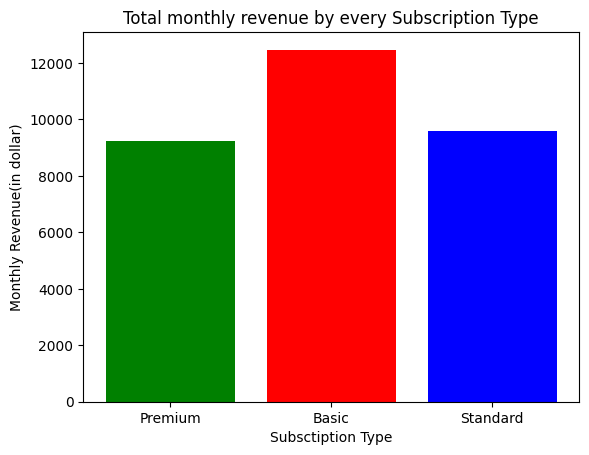

In [13]:
plt.bar((sub_bar.toPandas()['Subscription Type'].values),(sub_bar.toPandas()['sum(Monthly Revenue(in dollar))'].values),color=['green','red','blue'])
plt.title('Total monthly revenue by every Subscription Type')
plt.xlabel('Subsctiption Type')
plt.ylabel('Monthly Revenue(in dollar)')

## All countries in dataset

In [14]:
df_pyspark.select('Country').distinct().show()

+--------------+
|       Country|
+--------------+
|       Germany|
|        France|
| United States|
|         Italy|
|         Spain|
|        Mexico|
|        Canada|
|        Brazil|
|     Australia|
|United Kingdom|
+--------------+



## Country-wise monthly revenue(in dollar)

In [15]:
df_pyspark.select(['Country','Monthly Revenue(in dollar)']).groupby('Country').sum().show()
cnt_bar = df_pyspark.select(['Country','Monthly Revenue(in dollar)']).groupby('Country').sum()

+--------------+-------------------------------+
|       Country|sum(Monthly Revenue(in dollar))|
+--------------+-------------------------------+
|       Germany|                           2209|
|        France|                           2258|
| United States|                           6289|
|         Italy|                           2268|
|         Spain|                           5516|
|        Mexico|                           2187|
|        Canada|                           3826|
|        Brazil|                           2230|
|     Australia|                           2222|
|United Kingdom|                           2266|
+--------------+-------------------------------+



Text(0, 0.5, 'Monthly Revenue(in dollar)')

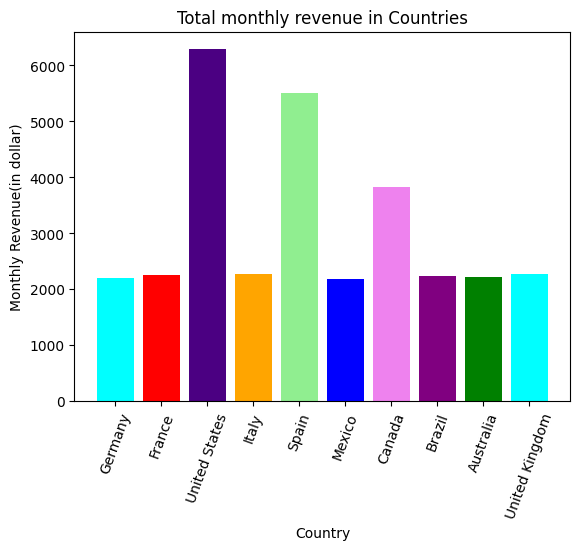

In [16]:
plt.bar(cnt_bar.toPandas()['Country'].values, cnt_bar.toPandas()['sum(Monthly Revenue(in dollar))'].values, color = ['cyan','red','indigo','orange','lightgreen','blue','violet','purple','green'])
plt.title('Total monthly revenue in Countries')
plt.xlabel('Country')
plt.xticks(rotation = 70)
plt.ylabel('Monthly Revenue(in dollar)')

## Total monthly revenue(in dollar)

In [17]:
df_pyspark.agg({'Monthly Revenue(in dollar)':'sum'}).show()

+-------------------------------+
|sum(Monthly Revenue(in dollar))|
+-------------------------------+
|                          31271|
+-------------------------------+



## Male-Female users ratio on netflix

In [18]:
male= df_pyspark.filter(df_pyspark['Gender']=='Male').count()
female = df_pyspark.filter(df_pyspark['Gender']=='Female').count()

Text(0.5, 1.0, 'Male-Female users ratio on netflix')

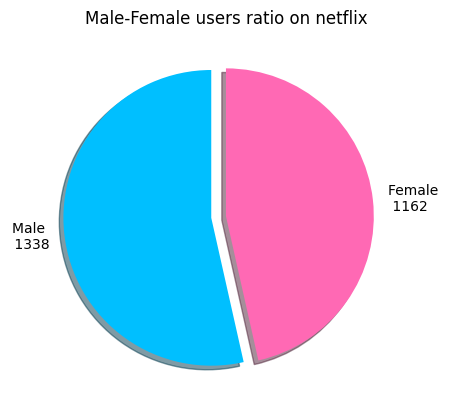

In [19]:
plt.pie([male, female], labels = [f'Male \n {male}',f'Female \n {female}'], startangle = 90, explode = [0.1,0], colors=['deepskyblue','hotpink'] , shadow = 1)
plt.title('Male-Female users ratio on netflix')

## Mothly revenue from different devices

In [20]:
df_pyspark.select('Device','Monthly Revenue(in dollar)').groupby('Device').sum().show()
dev = df_pyspark.select('Device','Monthly Revenue(in dollar)').groupby('Device').sum()

+----------+-------------------------------+
|    Device|sum(Monthly Revenue(in dollar))|
+----------+-------------------------------+
|    Laptop|                           7586|
|    Tablet|                           7119|
|  Smart TV|                           7039|
|Smartphone|                           9527|
+----------+-------------------------------+



Text(0.5, 1.0, 'Users categorized on the basis of devices')

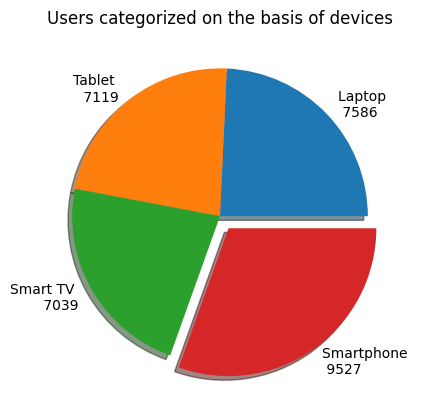

In [21]:
lap = dev.toPandas()['sum(Monthly Revenue(in dollar))'].values[0]
tab = dev.toPandas()['sum(Monthly Revenue(in dollar))'].values[1]
tv = dev.toPandas()['sum(Monthly Revenue(in dollar))'].values[2]
phone = dev.toPandas()['sum(Monthly Revenue(in dollar))'].values[3]
plt.pie(dev.toPandas()['sum(Monthly Revenue(in dollar))'].values, labels =[f'Laptop \n {lap}', f'Tablet \n {tab}', f'Smart TV \n {tv}', f'Smartphone \n {phone}'] ,explode = [0,0,0,0.1], shadow = 1)
plt.title('Users categorized on the basis of devices')

## Subscriber of minimum age

In [22]:
df_pyspark.agg({'Age':'min'}).show()

+--------+
|min(Age)|
+--------+
|      26|
+--------+



## Subscriber of maximum age

In [23]:
df_pyspark.agg({'Age':'max'}).show()

+--------+
|max(Age)|
+--------+
|      51|
+--------+



## No. of users in (25year to 35year) age category

In [67]:
df_pyspark.filter((df_pyspark['Age'] >= 25) & (df_pyspark['Age'] <= 35)).count()

916

## No. of users in (35year to 45year) age category

In [68]:
df_pyspark.filter((df_pyspark['Age'] >= 36) & (df_pyspark['Age'] <= 45)).count()

999

## No. of users in (45year to 55year) age category

In [37]:
df_pyspark.filter((df_pyspark['Age'] >= 46) & (df_pyspark['Age'] <= 55)).count()

585

## No. of users categorized in Age groups.

Text(0, 0.5, 'No. of users')

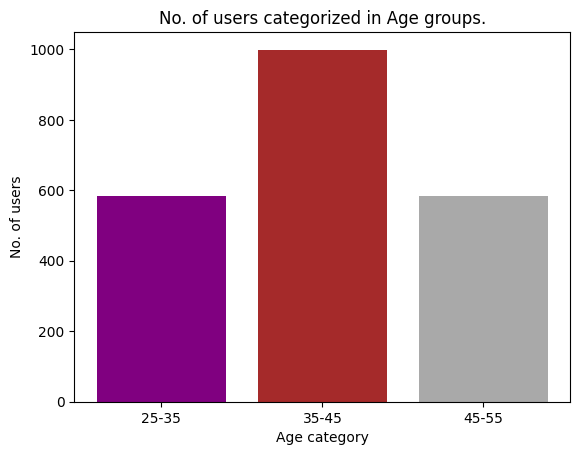

In [66]:
plt.bar(['25-35','35-45','45-55'], [df_pyspark.filter((df_pyspark['Age'] >= 46) & (df_pyspark['Age'] <= 55)).count(), \
        df_pyspark.filter((df_pyspark['Age'] >= 36) & (df_pyspark['Age'] <= 45)).count(), \
        df_pyspark.filter((df_pyspark['Age'] >= 46) & (df_pyspark['Age'] <= 55)).count()], \
       color = ['purple','brown','darkgrey'])
plt.title('No. of users categorized in Age groups.')
plt.xlabel('Age category')
plt.ylabel('No. of users')